In [1]:
import numpy as np
import pandas as pd
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("input/carstrucks-data/vehicles.csv")
print(df.shape)
print(df.columns)
df.head()

(426880, 26)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
# Get number of unique values per column
df.nunique(axis=0)

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

In [3]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,426880.000000,426880.000000,425675.000000,422480.000000,0.000000,420331.000000,420331.000000
mean,7311486634.224333,75199.033187,2011.235191,98043.331443,nan,38.493940,-94.748599
std,4473170.412559,12182282.173598,9.452120,213881.500798,nan,5.841533,18.365462
min,7207408119.000000,0.000000,1900.000000,0.000000,nan,-84.122245,-159.827728
25%,7308143339.250000,5900.000000,2008.000000,37704.000000,nan,34.601900,-111.939847
50%,7312620821.000000,13950.000000,2013.000000,85548.000000,nan,39.150100,-88.432600
75%,7315253543.500000,26485.750000,2017.000000,133542.500000,nan,42.398900,-80.832039
max,7317101084.000000,3736928711.000000,2022.000000,10000000.000000,nan,82.390818,173.885502


In [9]:
NA_val = df.isna().sum()

def na_filter(na, threshold =0.4): #only select variales that pass the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0] < threshold:
            col_pass.append(i)
    return col_pass

df_cleaned = df[na_filter(NA_val)]
df_cleaned.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'image_url', 'description', 'state',
       'lat', 'long', 'posting_date'],
      dtype='object')

<Axes: >

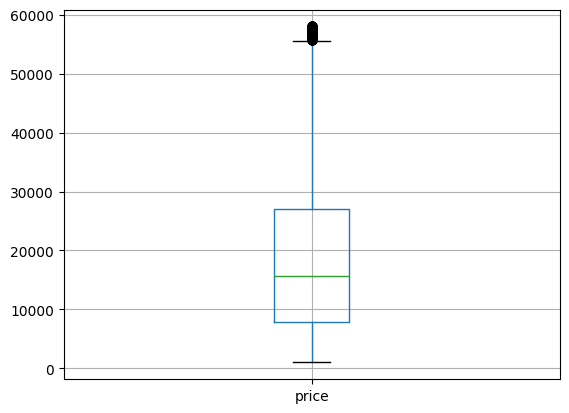

In [12]:
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 250000)] #compute price between 1k and 250k
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

#filtering values between Q1-1.5IQR and Q3+1.5IQR
df_filtered = df_cleaned.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('price')

In [14]:
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,372604.000000,372604.000000,371630.000000,370603.000000,369175.000000,369175.000000
mean,7311457144.051209,18385.632849,2010.902672,99341.800274,38.491268,-94.071033
std,4477649.799432,12581.683980,9.508069,186058.141666,5.816751,17.993853
min,7207408119.000000,1000.000000,1900.000000,0.000000,-84.122245,-159.719900
25%,7308073138.000000,7900.000000,2008.000000,39693.000000,34.728066,-108.552031
50%,7312556796.500000,15590.000000,2013.000000,89381.000000,39.190000,-87.865100
75%,7315237640.750000,26995.000000,2017.000000,137000.000000,42.316052,-80.720500
max,7317101084.000000,57990.000000,2022.000000,10000000.000000,82.390818,167.629911


In [15]:
df_filtered =  df_filtered[df_filtered['year'].between(1990, 2025)] # = 140000 + 1.5 * (140000-52379) #filter year between 1990 and 2025
df_filtered =  df_filtered[df_filtered['odometer'].between(0, 300000)] #filter odometer between 5k and 300k

In [16]:
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,356180.000000,356180.000000,356180.000000,356180.000000,352842.000000,352842.000000
mean,7311450840.744340,18511.254018,2012.208100,93858.842636,38.504651,-93.933327
std,4392504.289665,12571.067951,5.775335,61759.292032,5.822970,17.987784
min,7301583321.000000,1000.000000,1990.000000,0.000000,-81.838232,-159.719900
25%,7308049038.500000,7977.000000,2008.000000,40045.000000,34.758445,-107.893697
50%,7312515601.500000,15925.000000,2013.000000,90000.000000,39.236700,-87.732800
75%,7315227337.500000,27411.750000,2017.000000,137004.000000,42.335800,-80.671234
max,7317101084.000000,57990.000000,2022.000000,300000.000000,82.252826,167.629911


In [18]:
print(df.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [74]:
df_final = df_filtered.copy().drop(['id','url','region_url','image_url','region','description','model','state','paint_color','posting_date', 'VIN'], axis=1)
df_final.shape
print(df_final.columns)

Index(['price', 'year', 'manufacturer', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'lat', 'long'],
      dtype='object')


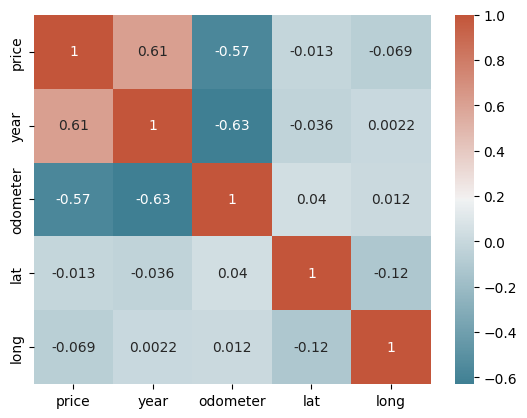

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

#calculate correlation matrix
corr = df_final.corr(numeric_only=True)# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.show()

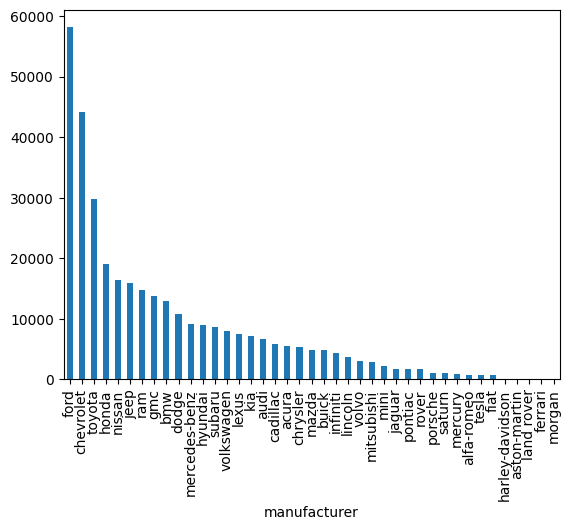

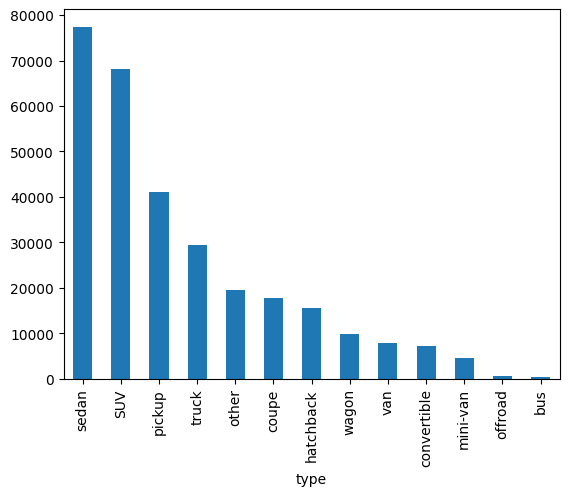

In [76]:
df_final['manufacturer'].value_counts().plot(kind='bar')
plt.show()
df_cleaned['type'].value_counts().plot(kind='bar')
plt.show()

In [77]:
df_final = pd.get_dummies(df_final, columns=df_final.select_dtypes(include='object').columns, drop_first=True)
print(df_final.columns)

Index(['price', 'year', 'odometer', 'lat', 'long', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_ferrari',
       'manufacturer_fiat', 'manufacturer_ford', 'manufacturer_gmc',
       'manufacturer_harley-davidson', 'manufacturer_honda',
       'manufacturer_hyundai', 'manufacturer_infiniti', 'manufacturer_jaguar',
       'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover',
       'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mercedes-benz', 'manufacturer_mercury',
       'manufacturer_mini', 'manufacturer_mitsubishi', 'manufacturer_morgan',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porsche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufact

In [78]:
from sklearn.preprocessing import StandardScaler

X_head = df_final.iloc[:, df_final.columns != 'price']

X = df_final.loc[:, df_final.columns != 'price']
y = df_final['price']
X = StandardScaler().fit_transform(X)

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split   
from sklearn.metrics import mean_absolute_error as mae

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [80]:
print(mae(y_test, pred))
print(df_final['price'].mean())
model.score(X_test, y_test)

2004.900801388555
18511.254017631534


0.9058909737717928

In [81]:
feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize=(10,10))

<Axes: >

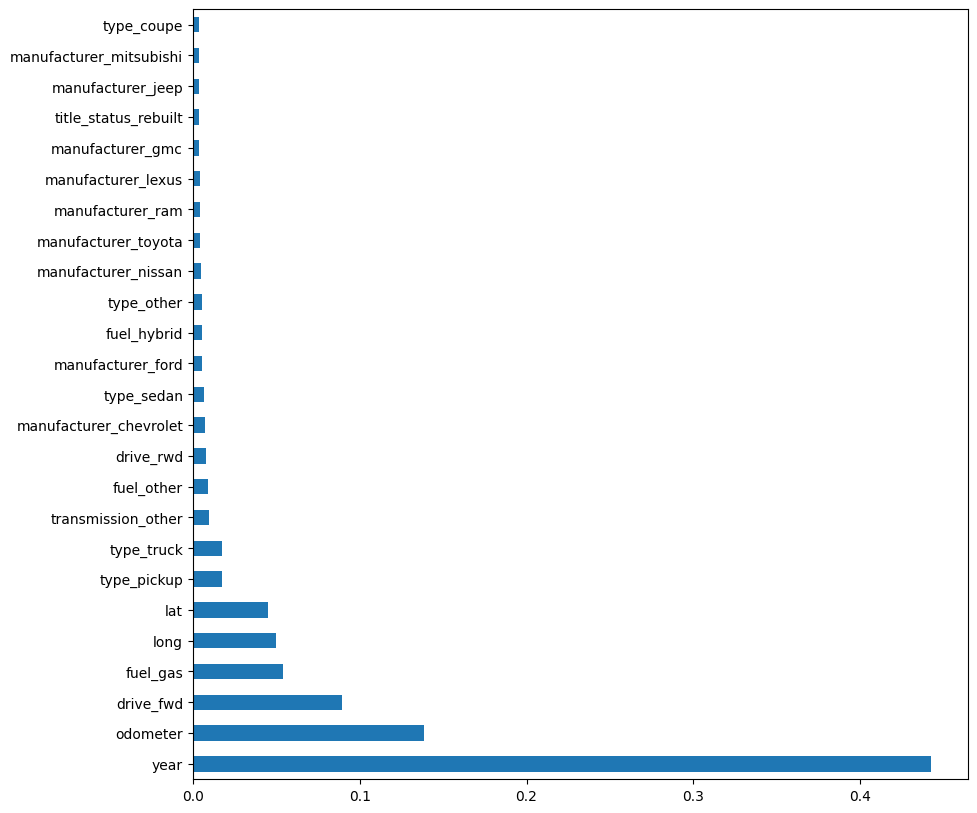

In [82]:
plt.show()